In [1]:
from knowledge_graph_builder4 import build_drug_graph, plot_drug_graph

In [18]:
excel_path = '../../data/output/rxnav_with_fda_with_orig.xlsx'  # adjust if necessary
drug_name = 'BRIXADI'
G = build_drug_graph(excel_path, drug_name)
print(f"Graph built for {drug_name}: {len(G.nodes())} nodes, {len(G.edges())} edges")


Graph built for BRIXADI: 84 nodes, 117 edges


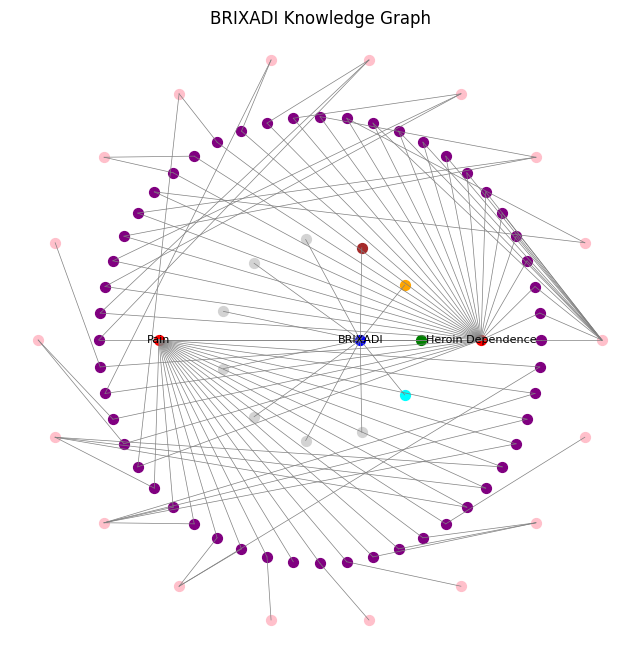

In [19]:
plot_drug_graph(G, title=f"{drug_name} Knowledge Graph")

In [4]:
from pyvis.network import Network
import networkx as nx

G = nx.read_graphml("../../data/output/kg/ALL_DRUGS_KG.graphml")

net = Network(height="800px", width="100%", select_menu=True)
net.from_nx(G)  # build the PyVis graph first

type_colour = {
    "Drug": "#1f77b4", "Approval_Date": "#2ca02c", "RxCUI": "#2ca02c",
    "Disease": "#ff7f0e", "ICD_Code": "#d62728", "ICD_Root": "#9467bd",
    "Ingredient": "#8c564b", "Precise_Ingredient": "#8c564b",
    "Brand": "#8c564b", "Formulary": "#8c564b", "Dose_Form": "#8c564b"
}

for node in net.nodes:
    node_id = node["id"]  # extract the ID from the dict
    gtype = G.nodes[node_id].get("type", None)
    node["color"] = type_colour.get(gtype, "#7f7f7f")

net.show("interactive_kg.html")


interactive_kg.html


AttributeError: 'NoneType' object has no attribute 'render'

In [5]:
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px

# Create knowledge graph
G = nx.Graph()
G.add_edges_from([("AI", "Machine Learning"), 
                  ("Machine Learning", "Deep Learning"),
                  ("AI", "Natural Language Processing")])

# Get positions
pos = nx.spring_layout(G)

# Create traces
edge_trace = go.Scatter(x=[], y=[], line=dict(width=2), 
                       hoverinfo='none', mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

node_trace = go.Scatter(x=[], y=[], mode='markers+text',
                       hoverinfo='text', text=[], textposition="middle center")

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)

fig = go.Figure(data=[edge_trace, node_trace])
fig.show()